In [1]:
! pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.11.1)


In [2]:
import seaborn as sns; sns.set_theme(style = "dark")
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='new_gapminder.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Unnamed: 0,country,year,LifeExp,income,population,continent
0,1,Afghanistan,1800,28.2,603,3280000,Asia
1,2,Albania,1800,35.4,667,400000,Europe
2,3,Algeria,1800,28.8,715,2500000,Africa
3,4,Andorra,1800,NaN,1200,2650,Europe
4,5,Angola,1800,27.0,618,1570000,Africa


In [4]:
df = df_data_1

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
df.head()

,country,year,LifeExp,income,population,continent
0,Afghanistan,1800,28.2,603,3280000,Asia
1,Albania,1800,35.4,667,400000,Europe
2,Algeria,1800,28.8,715,2500000,Africa
3,Andorra,1800,NaN,1200,2650,Europe
4,Angola,1800,27.0,618,1570000,Africa


In [7]:
def year_kde(df, year):
    df_new = df[df["year"] == year]
    plt.figure(figsize = (20,12))
    sns.kdeplot(x = "LifeExp", data = df_new, hue = "continent", palette = "deep", fill = False)
    plt.xlabel("Life Expectancy", fontsize = 12)
    plt.ylabel("Density", fontsize = 12)
    plt.title("Life Expectancy across continents in %d"%year, fontsize = 20)
    plt.show();

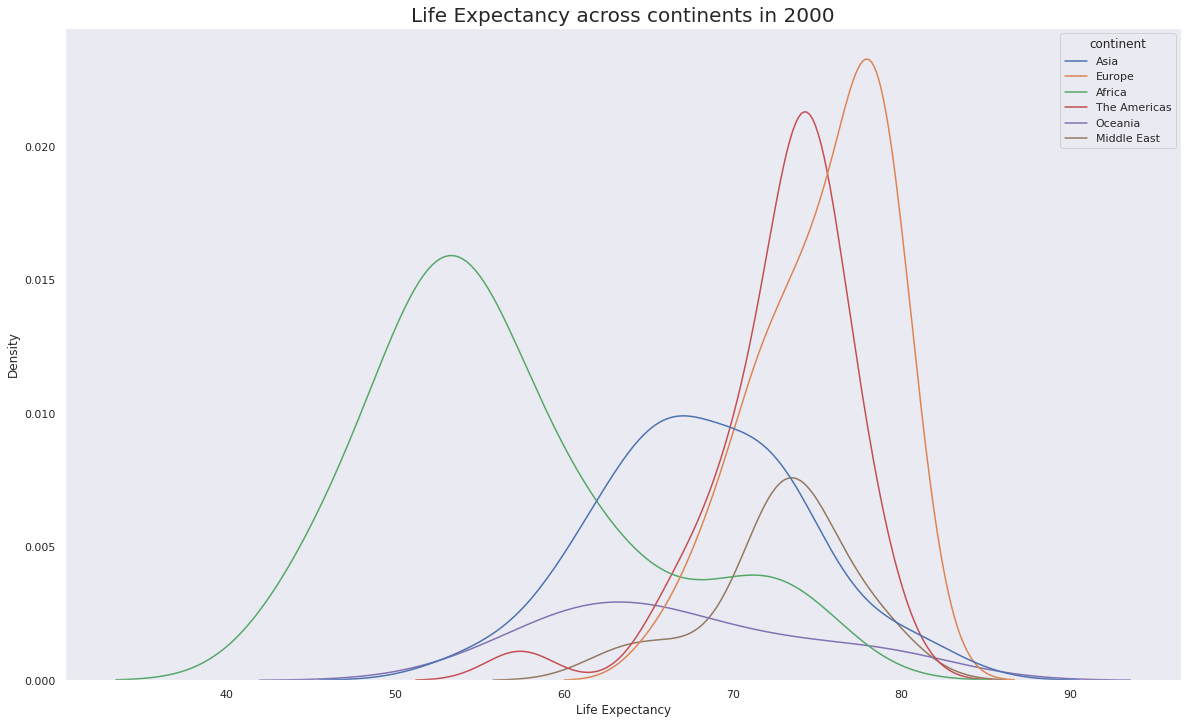

In [8]:
year_kde(df, 2000)

In [9]:
def year_scatter(df, year):
    df_new = df[df["year"] == year]
    plt.figure(figsize = (20,12))
    sns.scatterplot(x = "LifeExp", y = "income",data = df_new, hue = "continent", palette = "deep")
    plt.xlabel("Life Expectancy", fontsize = 12)
    plt.ylabel("Income", fontsize = 12)
    plt.title("Life Expectancy vs Income across continents in %d"%year, fontsize = 20)
    plt.show();

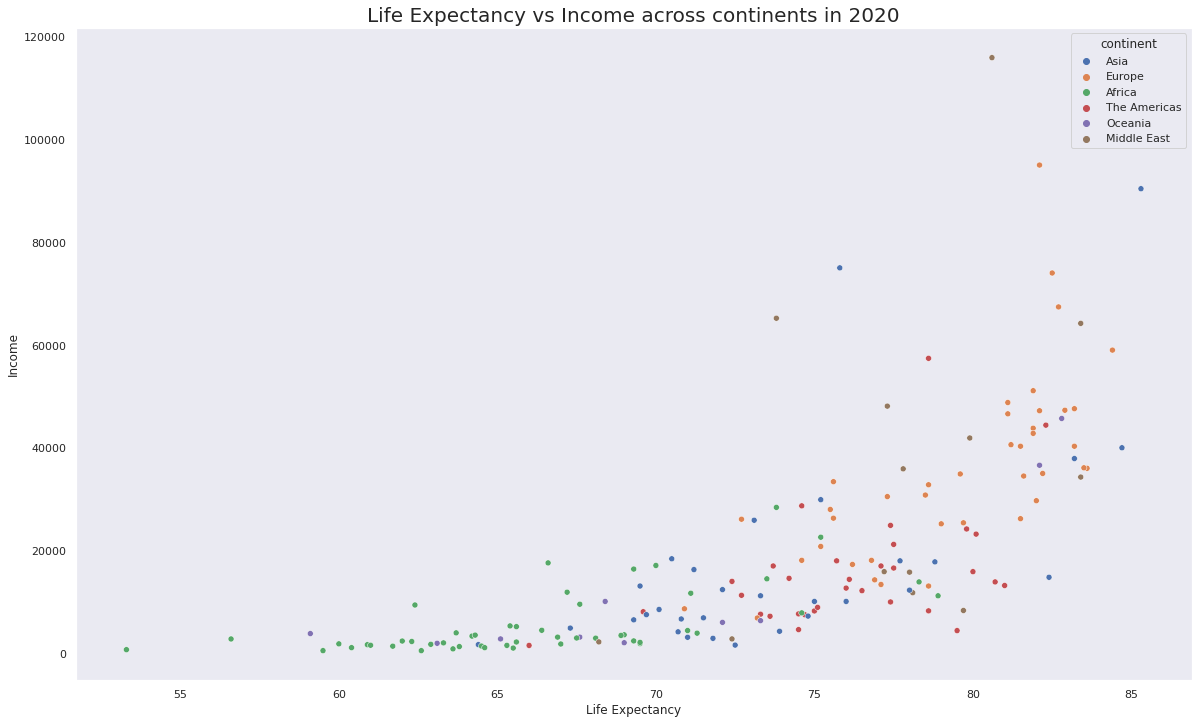

In [10]:
year_scatter(df, 2020)

In [11]:
def year_box(df, year):
    df_new = df[df["year"] == year]
    plt.figure(figsize = (20,10))
    sns.boxplot(x = "continent", y = "LifeExp",data = df_new, hue = "continent", palette = "deep")
    plt.xlabel("Continent", fontsize = 12)
    plt.ylabel("Life Expectancy", fontsize = 12)
    plt.title("Life Expectancy across continents in %d"%year, fontsize = 20)
    plt.show();

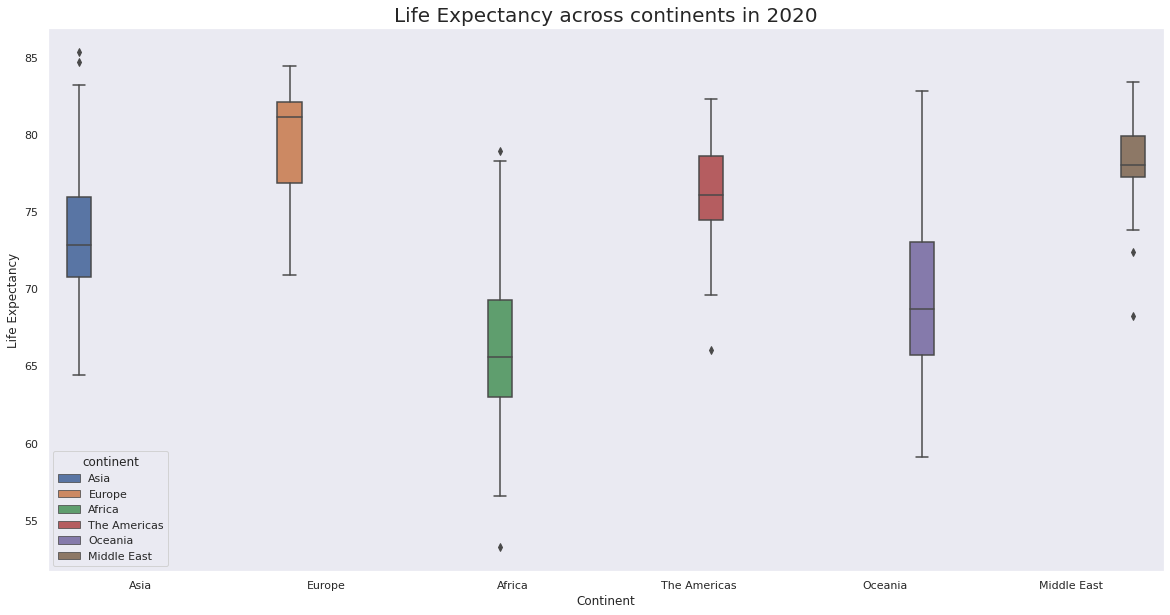

In [12]:
year_box(df, 2020)

In [13]:
df_type = df.groupby(["year", "continent"], as_index = False)["LifeExp"].median()

In [14]:
df_type1 = pd.DataFrame(df_type)

In [15]:
df_type1

,year,continent,LifeExp
0,1800,Africa,30.70
1,1800,Asia,29.60
2,1800,Europe,35.95
3,1800,Middle East,30.80
4,1800,Oceania,26.40
...,...,...,...
1441,2040,Asia,76.05
1442,2040,Europe,84.00
1443,2040,Middle East,81.50
1444,2040,Oceania,71.30


In [16]:
df_type1 = df_type1.rename(columns = {"LifeExp": "life"})

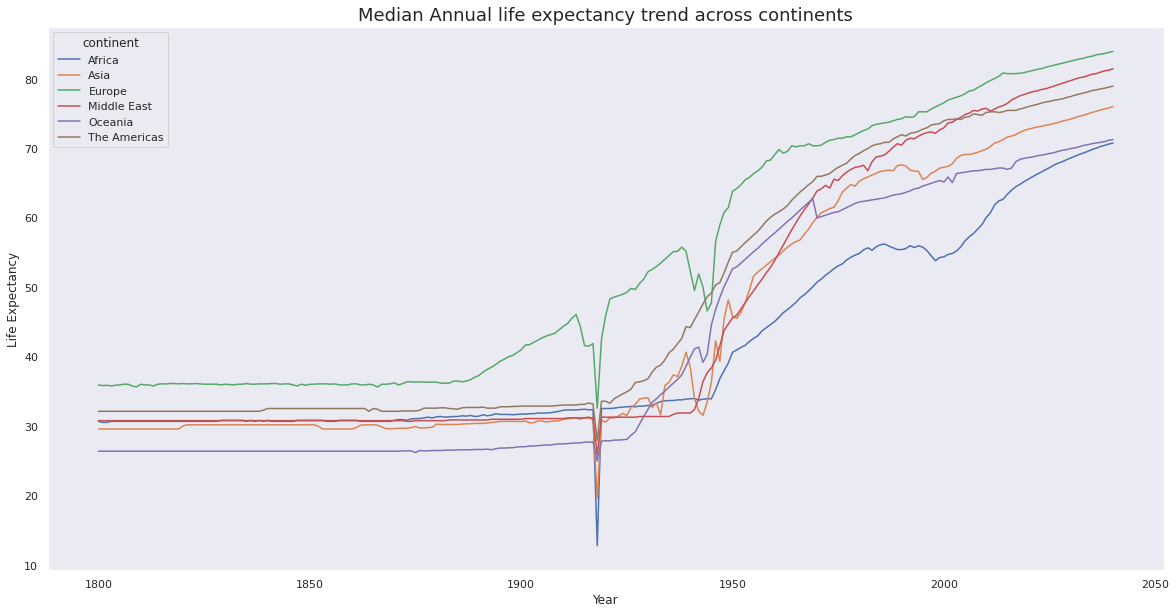

In [17]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "year", y = "life", data = df_type1, hue = "continent", palette = "deep")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Median Annual life expectancy trend across continents", fontsize = 18)
plt.show();